In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import datetime
from os.path import isfile,join
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

In [2]:
def get_url_resp(country="Worldwide"):
    base_url = "https://www.worldometers.info/coronavirus/"
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:74.0) Gecko/20100101 Firefox/74.0"}
    if country =="Worldwide":
        url = base_url
    else:
        url =base_url+"country/"+country+"/"
    response = requests.get(url, headers = headers)
    html = response.text
    return BeautifulSoup(html,"html.parser")

def format_case_numbers(soup,country="Worldwide"):
    if country == "Worldwide":
        soup_selector = soup.select(".col-md-6")
        val = [soup_selector[2].find_all(type="text/javascript")[0],soup_selector[3].find_all(type="text/javascript")[0]]
    else:
        soup_selector = soup.find_all("script")
        new_soup =[]
        for i in range(len(soup_selector)):
            if 'categories' in str(soup_selector[i]):
                new_soup.append(soup_selector[i])
        val = new_soup#[:2]
    return val

def get_right_element(val,Status = "Cases"):
    string1 = f"'Total Coronavirus {Status}'"
    new_soup =[]
    for i in range(len(val)):
        if string1 in str(val[i]):
            new_soup.append(val[i])
    return new_soup

def get_both_elements(val):#,country="Worldwide"):
    # if country=="Worldwide":
    #     return val
    # else:
    statuses_tuple = ("Cases","Deaths")
    new_soup = []
    for sta in statuses_tuple:
        new_soup.append(get_right_element(val,sta))
    return new_soup

def get_case_numbers_from_soup(val):#,country="Worldwide",status="Cases"):
    #dates = val.get_text().rsplit("categories",1)[1].split("[")[1].split("]")[0]
    dates = val.get_text().rsplit("categories")[1].split("[")[1].split("]")[0]
    case_num = val.get_text().rsplit("data")[1].split("[")[1].split("]")[0]
    case_num_formatted=case_num.split(',')
    dates_formatted=dates.split(',')
    case_num_lst=[]
    date_lst = []
    # for lst in case_num_lst,date_lst:
    #     lst.append(country)
    #     lst.append(status)

    for i in range(len(case_num_formatted)):
        if case_num_formatted[i] == "null":
            case_num_input = 0
        else:
            case_num_input = int(case_num_formatted[i])
        case_num_lst.append(case_num_input)

    for i in dates_formatted:
        date_lst.append(i.replace('"',''))
    return zip(date_lst,case_num_lst)

def get_case_dictionary(country="Worldwide"):#,status="Cases"):
    soup = get_url_resp(country)
    new_soup1 = format_case_numbers(soup,country)
    val = get_both_elements(new_soup1)
    statuses_tuple = ("Cases","Deaths")
    statuses = {
        "Cases":0,
        "Deaths":1,
    }
    lst=[]
    for sta in statuses_tuple:
        lst.append(dict(get_case_numbers_from_soup(val[statuses[sta]][0])))
    return lst
    #return dict(get_case_numbers_from_soup(val[statuses[status]]))#,country,status)
    # return get_case_numbers_from_soup(val[statuses[status]],country,status)


In [3]:
Countries = ("Worldwide","China","US","Italy","Spain","Germany","France","UK","India","South-Korea","Iran","Netherlands","Belgium","Switzerland","Turkey","Sweden","Indonesia","Portugal")
statuses_tuple = ("Cases","Deaths")
lst=[[],[]]
for country in Countries:
    for sta in statuses_tuple:
        lst[0].append(country)
        lst[1].append(sta)
### WORKS TO HERE ###
# lst = [["Worldwide","US"],["Cases","Cases"]]

data=[]
for country in Countries:
    country_data=get_case_dictionary(country=country)
    data.extend(country_data)

In [4]:
tuples = list(zip(*lst))
index = pd.MultiIndex.from_tuples(tuples)
cols = list(data[0].keys())

In [5]:
df = pd.DataFrame(data=data,index=index,dtype=pd.Int64Dtype())
df

Jan 22  Jan 23  Jan 24  Jan 25  Jan 26  Jan 27  Jan 28  \
Worldwide   Cases      580     845    1317    2015    2800    4581    6058   
            Deaths      17      25      41      56      80     106     132   
China       Cases      571     830    1287    1975    2744    4515    5974   
            Deaths      17      25      41      56      80     106     132   
US          Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Italy       Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Spain       Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Germany     Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
France      Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
UK          Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
India       Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
South-Korea Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Iran        Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Netherlands Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Belgium     Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Switzerland Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Turkey      Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Sweden      Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Indonesia   Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Portugal    Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   

                    Jan 29  Jan 30  Jan 31  ...   May 04   May 05   May 06  \
Worldwide   Cases     7813    9823   11950  ...  3639330  3720577  3815902   
            Deaths     170     213     259  ...   252240   258026   264837   
China       Cases     7711    9692   11791  ...    82880    82881    82883   
            Deaths     170     213     259  ...     4633     4633     4633   
US          Cases     <NA>    <NA>    <NA>  ...  1212835  1237633  1263092   
            Deaths    <NA>    <NA>    <NA>  ...    69921    72271    74799   
Italy       Cases     <NA>    <NA>    <NA>  ...   211938   213013   214457   
            Deaths    <NA>    <NA>    <NA>  ...    29079    29315    29684   
Spain       Cases     <NA>    <NA>    <NA>  ...   248301   250561   253682   
            Deaths    <NA>    <NA>    <NA>  ...    25428    25613    25857   
Germany     Cases     <NA>    <NA>    <NA>  ...   166152   167007   168162   
            Deaths    <NA>    <NA>    <NA>  ...     6993     6993     7275   
France      Cases     <NA>    <NA>    <NA>  ...   169462   170551   174191   
            Deaths    <NA>    <NA>    <NA

In [6]:
df.xs('Deaths',level=1)

,Jan 22,Jan 23,Jan 24,Jan 25,Jan 26,Jan 27,Jan 28,Jan 29,Jan 30,Jan 31,...,May 04,May 05,May 06,May 07,May 08,May 09,May 10,May 11,May 12,May 13
Worldwide,17,25,41,56,80,106,132,170,213,259,...,252240,258026,264837,270426,275976,280224,283732,287131,292451,297765
China,17,25,41,56,80,106,132,170,213,259,...,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633
US,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,69921,72271,74799,76928,78615,80037,80787,81795,83425,85197
Italy,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,29079,29315,29684,29958,30201,30395,30560,30739,30911,31106
Spain,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,25428,25613,25857,26070,26299,26478,26621,26744,26920,27104
Germany,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,6993,6993,7275,7392,7510,7549,7569,7661,7738,7861
France,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,25201,25531,25809,25987,26230,26310,26380,26643,26991,27074
UK,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,28734,29427,30076,30615,31241,31587,31855,32065,32692,33186
India,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,1566,1693,1785,1889,1985,2101,2212,2294,2415,2551
South-Korea,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,252,254,255,256,256,256,256,256,258,259


In [7]:
df.xs('Deaths',level=1)[df.columns[-14:]]

,Apr 30,May 01,May 02,May 03,May 04,May 05,May 06,May 07,May 08,May 09,May 10,May 11,May 12,May 13
Worldwide,233824,239447,244664,248144,252240,258026,264837,270426,275976,280224,283732,287131,292451,297765
China,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633
US,63856,65753,67444,68597,69921,72271,74799,76928,78615,80037,80787,81795,83425,85197
Italy,27967,28236,28710,28884,29079,29315,29684,29958,30201,30395,30560,30739,30911,31106
Spain,24543,24824,25100,25264,25428,25613,25857,26070,26299,26478,26621,26744,26920,27104
Germany,6623,6736,6812,6866,6993,6993,7275,7392,7510,7549,7569,7661,7738,7861
France,24376,24594,24760,24895,25201,25531,25809,25987,26230,26310,26380,26643,26991,27074
UK,26771,27510,28131,28446,28734,29427,30076,30615,31241,31587,31855,32065,32692,33186
India,1154,1223,1323,1391,1566,1693,1785,1889,1985,2101,2212,2294,2415,2551
South-Korea,247,248,250,250,252,254,255,256,256,256,256,256,258,259


In [8]:
def squeeze_nan(x, hold):
    if x.name not in hold:
        original_columns = x.index.tolist()

        squeezed = x.dropna()
        squeezed.index = [original_columns[n] for n in range(squeezed.count())]

        return squeezed.reindex(original_columns, fill_value=np.nan)
    else:
        return x

filter_num = 5000
filter_cases='Deaths'
start_num =300

df1 = df.xs(filter_cases,level = 1).fillna(0)
df2 = df1[df1>start_num]
df3 = df2.apply(lambda x: squeeze_nan(x, ['B']), axis=1).drop('Worldwide')
df3.columns=[f"Day {day+1}" for day in range(len(df3.columns.values.tolist()))]
keep_cols = df3.drop("China").dropna(how='all',axis=1).columns.values.tolist()
keep_indices = df3[df3>filter_num].dropna(how='all').index.values.tolist()
days = len(keep_cols)
# keep_indices = Countries
# keep_indices = ('Italy','Spain', 'France','US','UK')
all_indices = df3.index.values.tolist() 
drop_indices = [val for val in all_indices if val not in keep_indices]
df4_1 = df3[df3.columns[0:days]].drop(drop_indices).dropna(how='all').astype('Int64')
df4 = df4_1.sort_values(by=df4_1.columns.values.tolist()[::-1],ascending=True)
df4

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 58,Day 59,Day 60,Day 61,Day 62,Day 63,Day 64,Day 65,Day 66,Day 67
Italy,366,463,631,827,1016,1266,1441,1809,2158,2503,...,29079,29315,29684,29958,30201,30395,30560,30739,30911,31106
Iran,354,429,514,611,724,853,988,1135,1284,1433,...,6486,6541,6589,6640,6685,6733,6783,<NA>,<NA>,<NA>
Spain,342,533,638,831,1093,1381,1772,2311,2991,3647,...,26920,27104,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
France,372,450,562,674,860,1100,1331,1696,1995,2314,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
US,309,374,509,689,957,1260,1614,2110,2754,3251,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
UK,359,508,694,877,1161,1455,1669,2043,2425,3095,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Netherlands,356,434,546,639,771,864,1039,1173,1339,1487,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Germany,351,433,541,645,775,931,1107,1275,1444,1584,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Belgium,353,431,513,705,828,1011,1143,1283,1447,1632,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


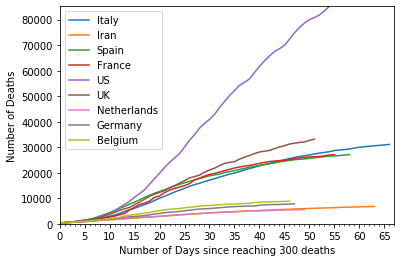

In [9]:
for country in df4.T.columns.values.tolist():
    line = df4.T[country].dropna().plot()
line.legend()
line.set_ylim((0,max(df4.max())))
line.set_xlim((0,days))
line.set_ylabel(f'Number of {filter_cases}')
line.set_xlabel(f'Number of Days since reaching {start_num} {filter_cases.lower()}')
# line.set_title(f'Number of Deaths after reaching {filter_num}')
# line.annotate('Italy in lockdown',xy=(3,500),xytext=(3, 4000),
#                 arrowprops=dict(facecolor='black', shrink=0.05),)
line.xaxis.set_major_locator(MultipleLocator(5))
line.xaxis.set_major_formatter(FormatStrFormatter('%d'))
line.xaxis.set_minor_locator(MultipleLocator(1))

plt.savefig(join("Coronavirus Graphs",f'Cumulative {filter_cases.lower()} {start_num} showing {days} days'))

In [10]:
filename_h="hourly cases.csv"
df_head_h=pd.read_csv(filename_h,nrows=0)
df_head_lst_h = list(df_head_h)[2:]
data_types_h = {val:pd.Int64Dtype() for val in df_head_lst_h}

month_dict ={3:"Mar",4:"Apr",5:'May'}

df_h = pd.read_csv(filename_h,index_col=[0,1],dtype=data_types_h).drop('Recovered',level=1).iloc[:,-1]
todays_date = month_dict[datetime.datetime.utcnow().month]+" "+str(datetime.datetime.utcnow().day)
df_h.name = todays_date
df_h

KeyError: 5

In [11]:
#attach latest hourly update to the end
df_copy = df.copy()

filter_num = 5000
filter_cases='Deaths'
start_num =5000

if todays_date in df_copy.columns.values.tolist():
    df_copy0 = df_copy
else:
    df_copy0 = df_copy.join(df_h,how='outer')
df_copy1 = df_copy0.xs(filter_cases,level = 1).fillna(0)
df_copy2 = df_copy1[df_copy1>start_num]
df_copy3 = df_copy2.apply(lambda x: squeeze_nan(x, ['B']), axis=1).drop('Worldwide')
df_copy3.columns=[f"Day {day+1}" for day in range(len(df_copy3.columns.values.tolist()))]
keep_cols = df_copy3.drop("China").dropna(how='all',axis=1).columns.values.tolist()
keep_indices = df_copy3[df_copy3>filter_num].dropna(how='all').index.values.tolist()
days = len(keep_cols)
# keep_indices = Countries
# keep_indices = ('Italy','Spain', 'France','US','UK')
all_indices = df_copy3.index.values.tolist() 
drop_indices = [val for val in all_indices if val not in keep_indices]
df_copy4_1 = df_copy3[df_copy3.columns[0:days]].drop(drop_indices).dropna(how='all').astype('Int64')
df_copy4 = df_copy4_1.sort_values(by=df_copy4_1.columns.values.tolist()[::-1],ascending=True)
df_copy4

NameError: name 'todays_date' is not defined

In [12]:
for country in df_copy4.T.columns.values.tolist():
    line = df_copy4.T[country].dropna().plot()
line.legend()
line.set_ylim((0,max(df_copy4.max())))
line.set_xlim((0,days))
line.set_ylabel(f'Number of {filter_cases}')
line.set_xlabel(f'Number of Days since reaching {start_num} {filter_cases.lower()}')
# line.set_title(f'Number of Deaths after reaching {filter_num}')
# line.annotate('Italy in lockdown',xy=(3,500),xytext=(3, 4000),
#                 arrowprops=dict(facecolor='black', shrink=0.05),)
line.xaxis.set_major_locator(MultipleLocator(5))
line.xaxis.set_major_formatter(FormatStrFormatter('%d'))
line.xaxis.set_minor_locator(MultipleLocator(1))
line.set_yscale('log') # log graph change to 'linear' for linear graph

plt.savefig(join("Coronavirus Graphs",f'Cumulative {filter_cases.lower()} {start_num} showing {days} days'))

NameError: name 'df_copy4' is not defined